In [1]:
! pip install -q kaggle

In [2]:
!pip install split-folders

In [3]:
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.applications.inception_v3 import InceptionV3

import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import os
import shutil

In [4]:
# kaggle.json contains the necessary API username and key to use Kaggle
!ls -lha kaggle.json &> /dev/null 

In [5]:
!mkdir -p ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
# hides Kaggle API key from users on server
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d iamsouravbanerjee/indian-food-images-dataset &> /dev/null 
!kaggle datasets download -d anshulmehtakaggl/themassiveindianfooddataset &> /dev/null 


In [9]:
!mkdir our_data

In [10]:
!unzip /content/indian-food-images-dataset.zip &> /dev/null 
!unzip /content/themassiveindianfooddataset.zip &> /dev/null

In [11]:
!mkdir "/content/dataset1"
!mkdir "/content/dataset2"

In [12]:
# splitfolders will split folders into train, valid, and test folders
splitfolders.ratio('/content/Indian Food Images/Indian Food Images', output="/content/dataset1", seed=1337, ratio=(.4, 0.4,0.2)) 

Copying files: 4000 files [00:01, 3547.78 files/s]


In [13]:
!mv /content/Biryani-resize /content/our_data/
!mv /content/Chole-Bhature-Resized /content/our_data/
!mv /content/Jalebi-Resize /content/our_data/
!mv /content/Kofta-Resized /content/our_data/
!mv /content/Naan-Resized /content/our_data/
!mv /content/Paneer-Tikka-resized /content/our_data/
!mv /content/Pani-Puri-resize /content/our_data/
!mv /content/Pav-Bhaji-Resized/ /content/our_data/
!mv /content/Vadapav-Resized/ /content/our_data/
!mv /content/dabeli-resize /content/our_data/
!mv /content/dal_resized /content/our_data/
!mv /content/dhokla-resize /content/our_data/
!mv /content/dosa_resized /content/our_data/
!mv /content/kathi-resize /content/our_data/
!mv /content/pakora-resize /content/our_data/

In [14]:
def moveFiles(source_folder, destination_folder):
  # fetch all files
  for file_name in os.listdir(source_folder):
      file_name_jpg = file_name[:-4] + ".jpg"

      # construct full file path
      source = source_folder + file_name

      ### convert .png to .jpg
      im1 = Image.open(r"{}".format(source))
      # remove alpha channel (RGBA)
      im1 = im1.convert('RGB')

      jpg_filepath = source_folder + file_name_jpg
      im1.save(r"{}".format(jpg_filepath))
      ### 

      source_jpg = source_folder + file_name_jpg
      destination = destination_folder + file_name_jpg

      # move only .jpg files
      if os.path.isfile(source_jpg):
          shutil.move(source_jpg, destination)

In [15]:
moveFiles("/content/our_data/Biryani-resize/resize/","/content/our_data/Biryani-resize/") 
moveFiles("/content/our_data/Chole-Bhature-Resized/Chole-Bhature-Resized/","/content/our_data/Chole-Bhature-Resized/")
moveFiles("/content/our_data/Jalebi-Resize/Jalebi-Resize/","/content/our_data/Jalebi-Resize/")
moveFiles("/content/our_data/Kofta-Resized/Kofta-Resized/","/content/our_data/Kofta-Resized/")
moveFiles("/content/our_data/Naan-Resized/Naan-Resized/","/content/our_data/Naan-Resized/")
moveFiles("/content/our_data/Paneer-Tikka-resized/Paneer-Tikka-resized/","/content/our_data/Paneer-Tikka-resized/")
moveFiles("/content/our_data/Pani-Puri-resize/resize/","/content/our_data/Pani-Puri-resize/")
moveFiles("/content/our_data/Pav-Bhaji-Resized/Pav-Bhaji-Resized/","/content/our_data/Pav-Bhaji-Resized/")
moveFiles("/content/our_data/Vadapav-Resized/Vadapav-Resized/","/content/our_data/Vadapav-Resized/")
moveFiles("/content/our_data/dal_resized/dal_resized/","/content/our_data/dal_resized/")
moveFiles("/content/our_data/pakora-resize/pakora-resize/","/content/our_data/pakora-resize/")
moveFiles("/content/our_data/dhokla-resize/dhokla-resize/","/content/our_data/dhokla-resize/")
moveFiles("/content/our_data/dosa_resized/dosa_resized/","/content/our_data/dosa_resized/")
moveFiles("/content/our_data/dabeli-resize/dabeli-resize/","/content/our_data/dabeli-resize/")
moveFiles("/content/our_data/kathi-resize/kathi-resize/","/content/our_data/kathi-resize/")

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [16]:
!rm -rf "/content/our_data/Biryani-resize/resize/" 
!rm -rf "/content/our_data/Chole-Bhature-Resized/Chole-Bhature-Resized/" 
!rm -rf "/content/our_data/Jalebi-Resize/Jalebi-Resize/"
!rm -rf "/content/our_data/Kofta-Resized/Kofta-Resized/"
!rm -rf "/content/our_data/Naan-Resized/Naan-Resized/"
!rm -rf "/content/our_data/Paneer-Tikka-resized/Paneer-Tikka-resized/"
!rm -rf "/content/our_data/Pani-Puri-resize/resize/"
!rm -rf "/content/our_data/Pav-Bhaji-Resized/Pav-Bhaji-Resized/"
!rm -rf "/content/our_data/Vadapav-Resized/Vadapav-Resized/"
!rm -rf "/content/our_data/dal_resized/dal_resized/"
!rm -rf "/content/our_data/pakora-resize/pakora-resize/"
!rm -rf "/content/our_data/dhokla-resize/dhokla-resize/"
!rm -rf "/content/our_data/dosa_resized/dosa_resized/"
!rm -rf "/content/our_data/dabeli-resize/dabeli-resize/"
!rm -rf "/content/our_data/kathi-resize/kathi-resize/"

In [17]:
splitfolders.ratio('/content/our_data', output="/content/dataset2", seed=1337, ratio=(.4, 0.4,0.2)) 

Copying files: 4770 files [00:00, 7102.59 files/s]


In [18]:
# move all files into the folder our_data
with open("List of Indian Foods.txt", "r") as a_file:
  for line in a_file:
    stripped_line = line.strip()
    !mv "/content/Indian Food Images/Indian Food Images/{stripped_line}" "/content/our_data" &> /dev/null 



In [19]:
# most subfolders were not removed from the Indian Food Images folder, so we repeat the process
with open("List of Indian Foods.txt", "r") as a_file:
  for line in a_file:
    stripped_line = line.strip()
    !mv "/content/our_data/Indian Food Images/{stripped_line}" "/content/our_data" &> /dev/null 

In [20]:
# make new folders for same resize-named folders 
!mkdir "/content/our_data/chole_bhature"
!mkdir "/content/our_data/paneer_tikka"
!mkdir "/content/our_data/paneer_puri"
!mkdir "/content/our_data/pav_bhaji"
!mkdir "/content/our_data/vadapav"
!mkdir "/content/our_data/dal"
!mkdir "/content/our_data/pakora"
!mkdir "/content/our_data/dhokla"
!mkdir "/content/our_data/dosa"
!mkdir "/content/our_data/dabeli"
!mkdir "/content/our_data/kathi"

In [21]:
!rm -rf themassiveindianfooddataset.zip indian-food-images-dataset.zip sample_data/ food20dataset

In [22]:
# delete unneeded folders
!rm -rf "/content/Indian Food Images/"
!rm -rf "/content/our_data/Indian Food Images/"

In [23]:
moveFiles("/content/our_data/Biryani-resize/","/content/our_data/biryani/") 
moveFiles("/content/our_data/Chole-Bhature-Resized/","/content/our_data/chole_bhature/")
moveFiles("/content/our_data/Jalebi-Resize/","/content/our_data/jalebi/")
moveFiles("/content/our_data/Kofta-Resized/","/content/our_data/kofta/")
moveFiles("/content/our_data/Naan-Resized/","/content/our_data/naan/")
moveFiles("/content/our_data/Paneer-Tikka-resized/","/content/our_data/paneer_tikka/")
moveFiles("/content/our_data/Pani-Puri-resize/","/content/our_data/paneer_puri/")
moveFiles("/content/our_data/Pav-Bhaji-Resized/","/content/our_data/pav_bhaji/")
moveFiles("/content/our_data/Vadapav-Resized/","/content/our_data/vadapav/")
moveFiles("/content/our_data/dal_resized/","/content/our_data/dal/")
moveFiles("/content/our_data/pakora-resize/","/content/our_data/pakora/")
moveFiles("/content/our_data/dhokla-resize/","/content/our_data/dhokla/")
moveFiles("/content/our_data/dosa_resized/","/content/our_data/dosa/")
moveFiles("/content/our_data/dabeli-resize/","/content/our_data/dabeli/")
moveFiles("/content/our_data/kathi-resize/","/content/our_data/kathi/")

In [24]:
# remove unnecessary folders after moving files
!rm -rf "/content/our_data/kathi-resize/" "/content/our_data/dabeli-resize" "/content/our_data/dosa_resized" "/content/our_data/dhokla-resize/" "/content/our_data/pakora-resize/" "/content/our_data/dal_resized/" "/content/our_data/Vadapav-Resized/" "/content/our_data/Biryani-resize/" "/content/our_data/Chole-Bhature-Resized/" "/content/our_data/Jalebi-Resize/" "/content/our_data/Kofta-Resized/" "/content/our_data/Naan-Resized/" "/content/our_data/Paneer-Tikka-resized/" "/content/our_data/Pani-Puri-resize/" "/content/our_data/Pav-Bhaji-Resized/"

In [25]:
#split folders that have both datasets
splitfolders.ratio('/content/our_data/', output="/content/our_data", seed=1337, ratio=(.4, 0.4,0.2)) 


Copying files: 8770 files [00:01, 5018.75 files/s]


In [26]:
batch_size = 32
number_of_epochs = 100

In [27]:
# preprocessing: data augmentation, dataset 1
datagen1_train = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.2, 
    width_shift_range=0.4,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=True,
    rescale = 1./255,
)  

datagen1_valid = ImageDataGenerator(rescale = 1./255,)

# input matrices
# load and iterate training dataset
train_data1 = datagen1_train.flow_from_directory(
    "/content/dataset1/train/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_data1 = datagen1_valid.flow_from_directory(
    "/content/dataset1/val/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)



Found 1600 images belonging to 80 classes.
Found 1600 images belonging to 80 classes.


In [28]:
# preprocessing: data augmentation, dataset 2
datagen2_train = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.2, 
    width_shift_range=0.4,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=True,
    rescale = 1./255,
)  

datagen2_valid = ImageDataGenerator(rescale = 1./255,)

# input matrices
# load and iterate training dataset
train_data2 = datagen2_train.flow_from_directory(
    "/content/dataset2/train/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_data2 = datagen2_valid.flow_from_directory(
    "/content/dataset2/val/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)



Found 1902 images belonging to 15 classes.
Found 1902 images belonging to 15 classes.


In [29]:
# preprocessing: data augmentation, both datasets
datagen_both_train = ImageDataGenerator(
    rotation_range=10,  
    zoom_range=0.2, 
    width_shift_range=0.4,  
    height_shift_range=0.1, 
    horizontal_flip=True, 
    vertical_flip=True,
    rescale = 1./255,
)  

datagen_both_valid = ImageDataGenerator(rescale = 1./255,)

# input matrices
# load and iterate training dataset
train_both = datagen_both_train.flow_from_directory(
    "/content/our_data/train/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)
# load and iterate validation dataset
valid_both = datagen_both_valid.flow_from_directory(
    "/content/our_data/val/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)

Found 3502 images belonging to 91 classes.
Found 3502 images belonging to 91 classes.


In [30]:
data1_size = 1600
data1_classes = 80

data2_size = 1902
data2_classes = 15

data_both_size = 3502
data_both_classes = 91

In [31]:
datagen_test = ImageDataGenerator(rescale = 1./255,)
test_data1 = datagen_test.flow_from_directory(
    "/content/dataset1/test/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
    shuffle = False,
)

test_data2 = datagen_test.flow_from_directory(
    "/content/dataset2/test/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
     shuffle = False,
)

test_data_both = datagen_test.flow_from_directory(
    "/content/our_data/test/",
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
     shuffle = False,
)

Found 800 images belonging to 80 classes.
Found 966 images belonging to 15 classes.
Found 1766 images belonging to 91 classes.


In [32]:
#callback for all experiments
es = EarlyStopping(patience=10, restore_best_weights=True)

Experiment 1 - Inception Model

In [33]:
# 1st pre-trained experiment, with dataset 1

base_model =  InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_initializer=HeNormal())(x)
x = Dense(128, activation='relu', kernel_initializer=HeNormal())(x)
predictions = Dense(data1_classes, activation='softmax',kernel_initializer='glorot_normal')(x)
inception_model = Model(inputs=base_model.input, outputs=predictions)

87924736/87910968 [==============================] - 0s 0us/step


In [34]:
for layer in inception_model.layers:
  layer.trainable = False

added_layers = inception_model.layers[-3:]

for layer in added_layers:
  layer.trainable = True

In [35]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

inception_model.compile(optimizer=optimizer, metrics=['categorical_accuracy'],
              loss='categorical_crossentropy')

In [36]:
inception_model.fit(train_data1,
          steps_per_epoch=data1_size/batch_size, 
          validation_data=valid_data1,
          validation_steps=data1_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

Epoch 1/100
50/50 [==============================] - 59s 893ms/step - loss: 6.5040 - categorical_accuracy: 0.0169 - val_loss: 4.2922 - val_categorical_accuracy: 0.0244
Epoch 2/100
50/50 [==============================] - 44s 878ms/step - loss: 4.2588 - categorical_accuracy: 0.0219 - val_loss: 4.1781 - val_categorical_accuracy: 0.0275
Epoch 3/100
50/50 [==============================] - 43s 869ms/step - loss: 4.1801 - categorical_accuracy: 0.0231 - val_loss: 4.1351 - val_categorical_accuracy: 0.0237
Epoch 4/100
50/50 [==============================] - 43s 866ms/step - loss: 4.1412 - categorical_accuracy: 0.0213 - val_loss: 4.1329 - val_categorical_accuracy: 0.0256
Epoch 5/100
50/50 [==============================] - 43s 874ms/step - loss: 4.1288 - categorical_accuracy: 0.0200 - val_loss: 4.0840 - val_categorical_accuracy: 0.0294
Epoch 6/100
50/50 [==============================] - 45s 902ms/step - loss: 4.0991 - categorical_accuracy: 0.0250 - val_loss: 4.0470 - val_categorical_accuracy:

In [37]:
print(inception_model.evaluate(test_data1))

25/25 [==============================] - 7s 272ms/step - loss: 3.0880 - categorical_accuracy: 0.2087
[3.0879900455474854, 0.20874999463558197]


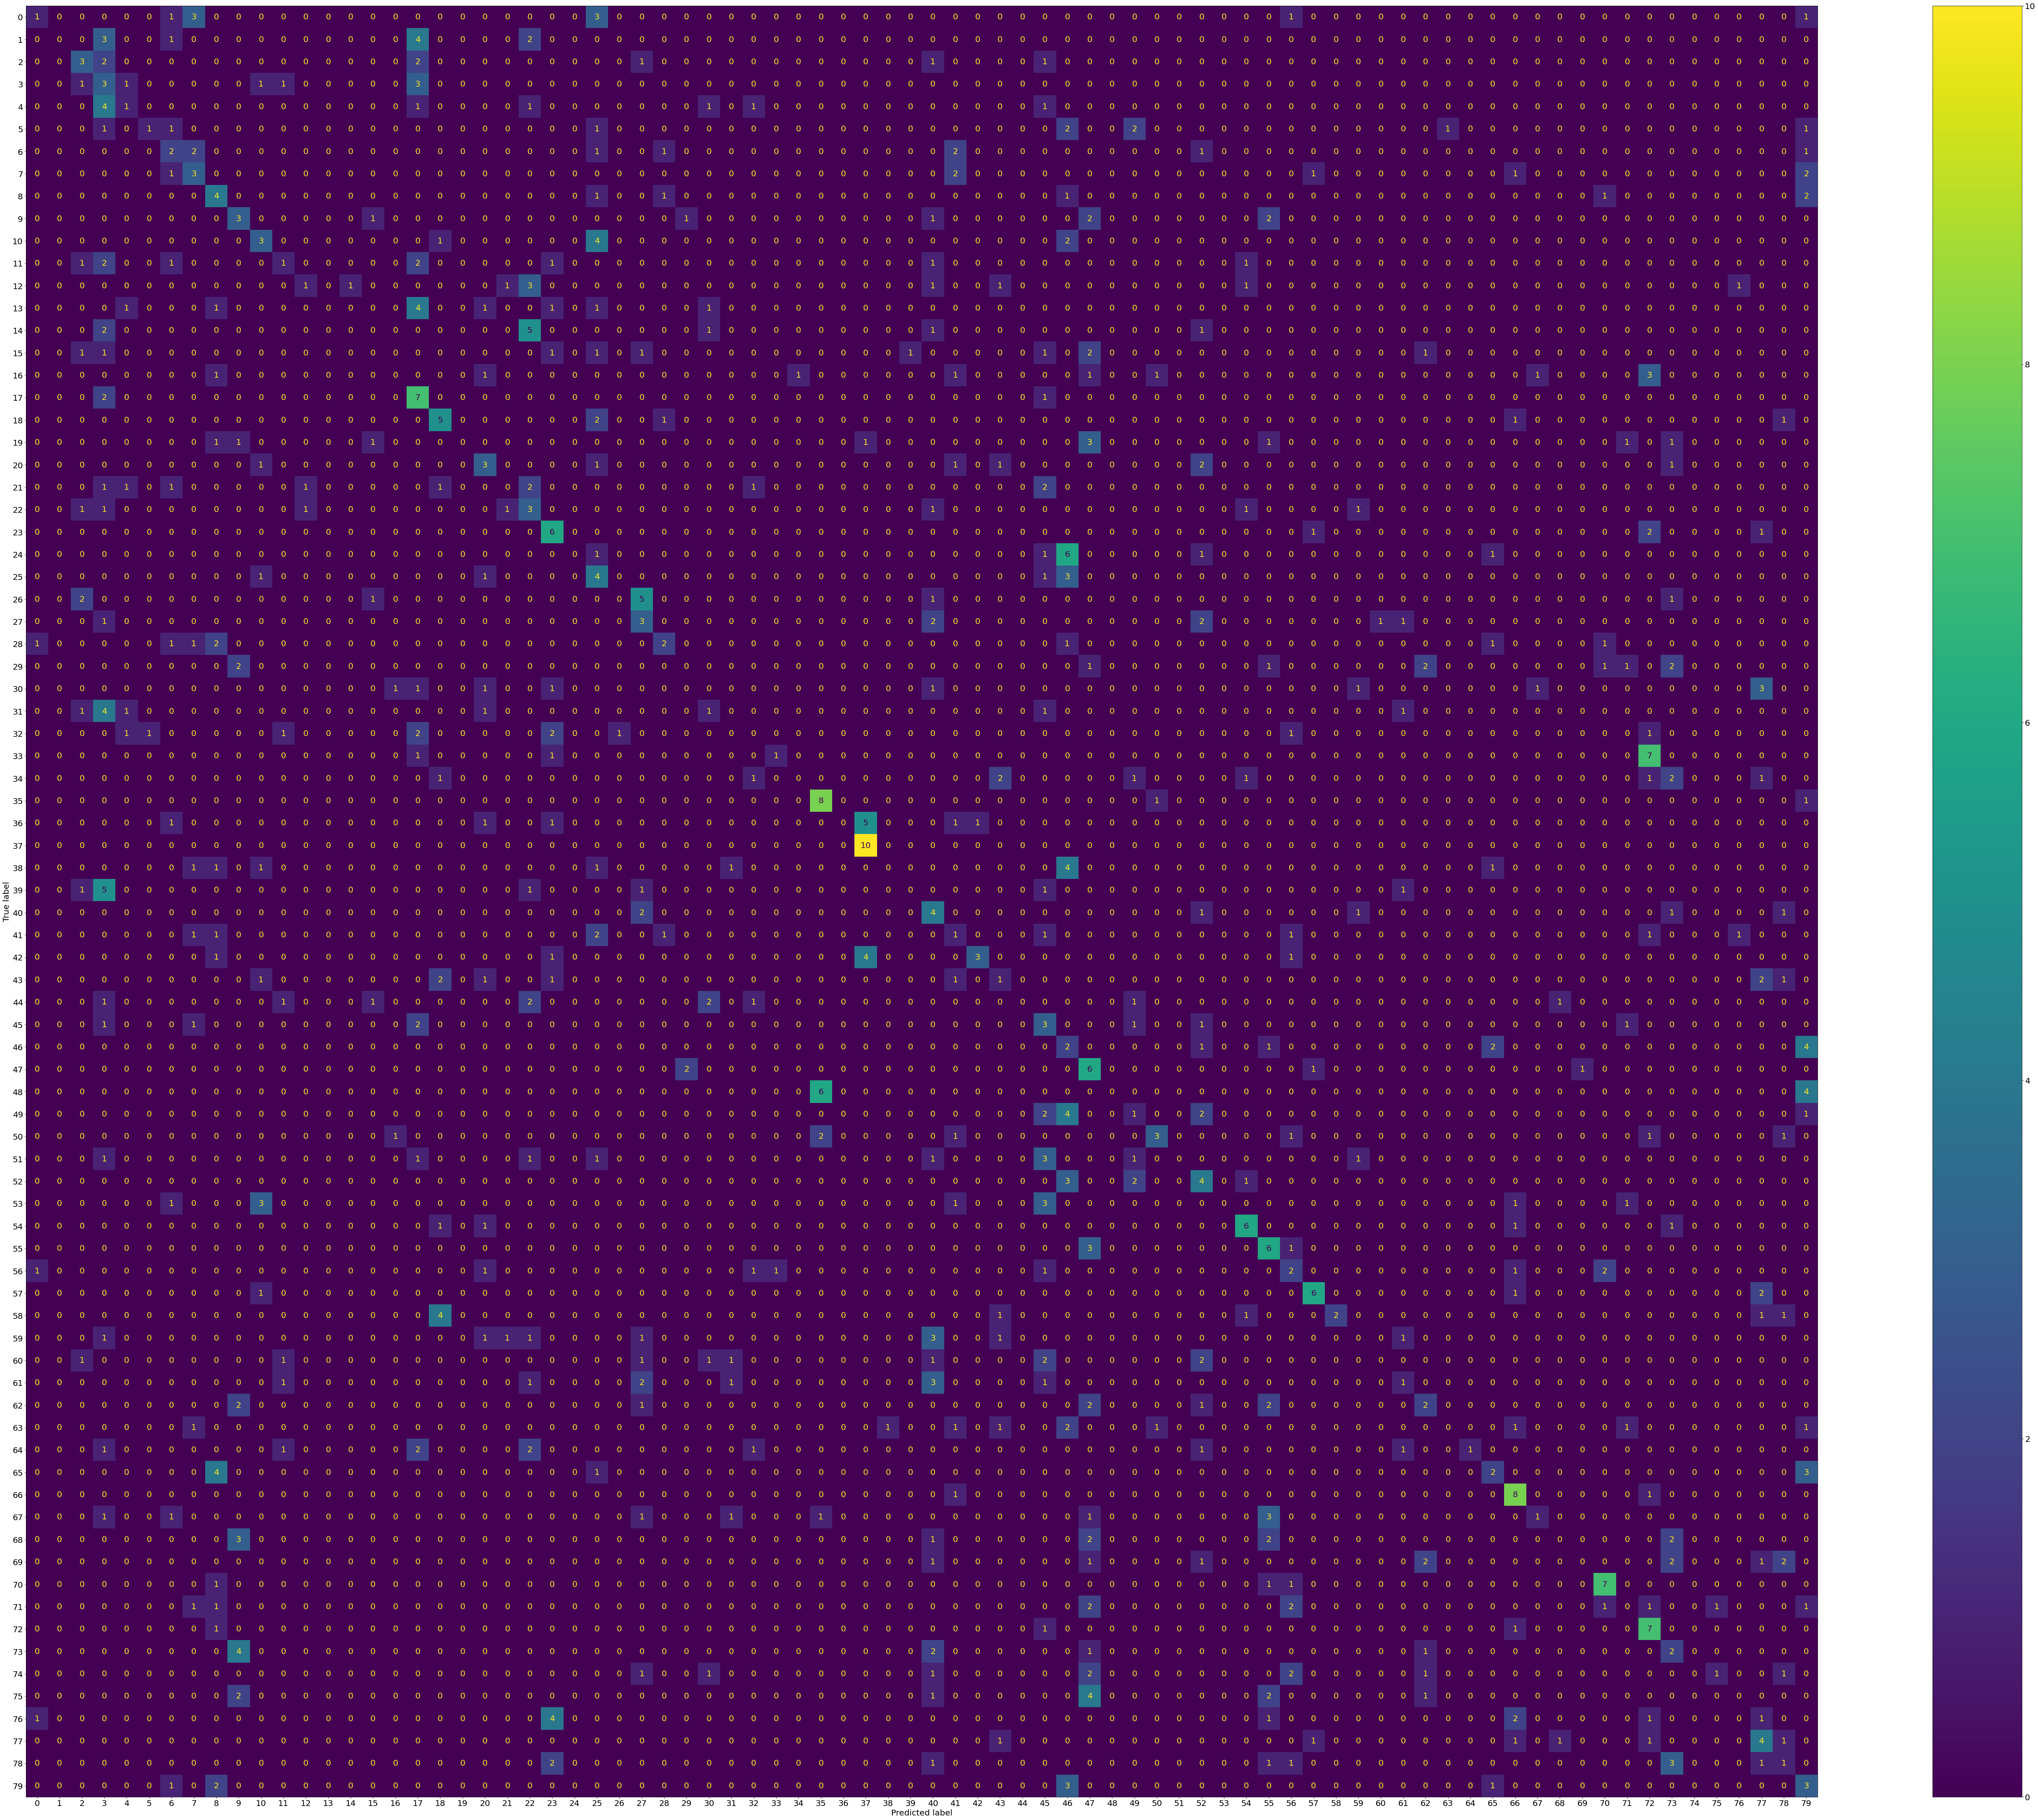

In [42]:
# inception, test data 1

y_pred = inception_model.predict(test_data1, data1_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data1_classes))

cm = confusion_matrix(test_data1.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams.update({'figure.figsize': (100, 90 )})
plt.rcParams.update({'font.size': 20})
plt.show()

In [39]:
print(classification_report(test_data1.classes, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.10      0.14        10
           1       0.00      0.00      0.00        10
           2       0.25      0.30      0.27        10
           3       0.08      0.30      0.12        10
           4       0.17      0.10      0.12        10
           5       0.50      0.10      0.17        10
           6       0.15      0.20      0.17        10
           7       0.21      0.30      0.25        10
           8       0.19      0.40      0.26        10
           9       0.18      0.30      0.22        10
          10       0.25      0.30      0.27        10
          11       0.14      0.10      0.12        10
          12       0.33      0.10      0.15        10
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00        10
          17       0.22    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# 1st pre-trained experiment, with dataset 2
base_model =  InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_initializer=HeNormal())(x)
x = Dense(128, activation='relu', kernel_initializer=HeNormal())(x)
predictions = Dense(data2_classes, activation='softmax',kernel_initializer='glorot_normal')(x)
inception_model = Model(inputs=base_model.input, outputs=predictions)

In [44]:
for layer in inception_model.layers:
  layer.trainable = False

added_layers = inception_model.layers[-3:]

for layer in added_layers:
  layer.trainable = True

In [45]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

inception_model.compile(optimizer=optimizer, metrics=['categorical_accuracy'],
              loss='categorical_crossentropy')

In [46]:
inception_model.fit(train_data2,
          steps_per_epoch=data2_size/batch_size, 
          validation_data=valid_data2,
          validation_steps=data2_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

Epoch 1/100
59/59 [==============================] - 35s 519ms/step - loss: 5.9194 - categorical_accuracy: 0.2440 - val_loss: 1.7025 - val_categorical_accuracy: 0.4458
Epoch 2/100
59/59 [==============================] - 29s 485ms/step - loss: 1.6070 - categorical_accuracy: 0.4863 - val_loss: 1.2894 - val_categorical_accuracy: 0.5931
Epoch 3/100
59/59 [==============================] - 29s 491ms/step - loss: 1.3087 - categorical_accuracy: 0.5762 - val_loss: 1.0967 - val_categorical_accuracy: 0.6335
Epoch 4/100
59/59 [==============================] - 29s 493ms/step - loss: 1.1897 - categorical_accuracy: 0.6094 - val_loss: 1.2080 - val_categorical_accuracy: 0.6472
Epoch 5/100
59/59 [==============================] - 29s 483ms/step - loss: 1.1738 - categorical_accuracy: 0.6120 - val_loss: 0.8645 - val_categorical_accuracy: 0.7192
Epoch 6/100
59/59 [==============================] - 29s 484ms/step - loss: 1.0695 - categorical_accuracy: 0.6477 - val_loss: 0.9595 - val_categorical_accuracy:

In [47]:
print(inception_model.evaluate(test_data2))

31/31 [==============================] - 4s 121ms/step - loss: 0.6654 - categorical_accuracy: 0.7847
[0.6654168367385864, 0.784679114818573]


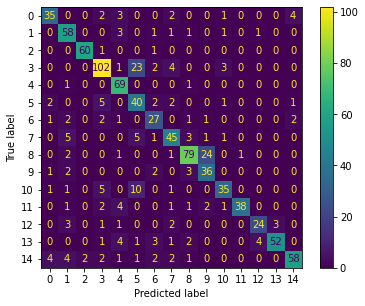

In [50]:
# inception, test data 2

y_pred = inception_model.predict(test_data2, data2_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data2_classes))

cm = confusion_matrix(test_data2.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams.update({'figure.figsize': (6.4, 4.8 )})
plt.rcParams.update({'font.size': 20})
plt.show()

In [49]:
print(classification_report(test_data2.classes, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        47
           1       0.73      0.88      0.80        66
           2       0.97      0.97      0.97        62
           3       0.83      0.76      0.79       135
           4       0.78      0.97      0.87        71
           5       0.50      0.75      0.60        53
           6       0.66      0.73      0.69        37
           7       0.73      0.74      0.73        61
           8       0.86      0.73      0.79       108
           9       0.56      0.82      0.67        44
          10       0.81      0.66      0.73        53
          11       0.97      0.76      0.85        50
          12       0.83      0.71      0.76        34
          13       0.95      0.76      0.85        68
          14       0.89      0.75      0.82        77

    accuracy                           0.78       966
   macro avg       0.79      0.78      0.78       966
weighted avg       0.81   

In [51]:
# 1st pre-trained experiment, with both datasets
base_model =  InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_initializer=HeNormal())(x)
x = Dense(128, activation='relu', kernel_initializer=HeNormal())(x)
predictions = Dense(data_both_classes, activation='softmax',kernel_initializer='glorot_normal')(x)
inception_model = Model(inputs=base_model.input, outputs=predictions)

In [52]:
for layer in inception_model.layers:
  layer.trainable = False

added_layers = inception_model.layers[-3:]

for layer in added_layers:
  layer.trainable = True

In [53]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)

inception_model.compile(optimizer=optimizer, metrics=['categorical_accuracy'],
              loss='categorical_crossentropy')

In [54]:
inception_model.fit(train_both,
          steps_per_epoch=data_both_size/batch_size, 
          validation_data=valid_both,
          validation_steps=data_both_size/batch_size,
          epochs=number_of_epochs,
          callbacks=[es])

Epoch 1/100
109/109 [==============================] - 78s 673ms/step - loss: 4.8360 - categorical_accuracy: 0.0620 - val_loss: 4.0485 - val_categorical_accuracy: 0.1185
Epoch 2/100
109/109 [==============================] - 71s 653ms/step - loss: 3.9090 - categorical_accuracy: 0.0999 - val_loss: 3.8276 - val_categorical_accuracy: 0.0814
Epoch 3/100
109/109 [==============================] - 71s 652ms/step - loss: 3.7731 - categorical_accuracy: 0.1159 - val_loss: 3.6507 - val_categorical_accuracy: 0.1339
Epoch 4/100
109/109 [==============================] - 71s 649ms/step - loss: 3.7386 - categorical_accuracy: 0.1359 - val_loss: 3.7069 - val_categorical_accuracy: 0.1105
Epoch 5/100
109/109 [==============================] - 71s 653ms/step - loss: 3.7192 - categorical_accuracy: 0.1322 - val_loss: 3.4967 - val_categorical_accuracy: 0.1790
Epoch 6/100
109/109 [==============================] - 71s 651ms/step - loss: 3.5538 - categorical_accuracy: 0.1779 - val_loss: 3.3960 - val_categoric

In [55]:
print(inception_model.evaluate(test_data_both))

56/56 [==============================] - 10s 183ms/step - loss: 2.7570 - categorical_accuracy: 0.3567
[2.7569680213928223, 0.3567383885383606]


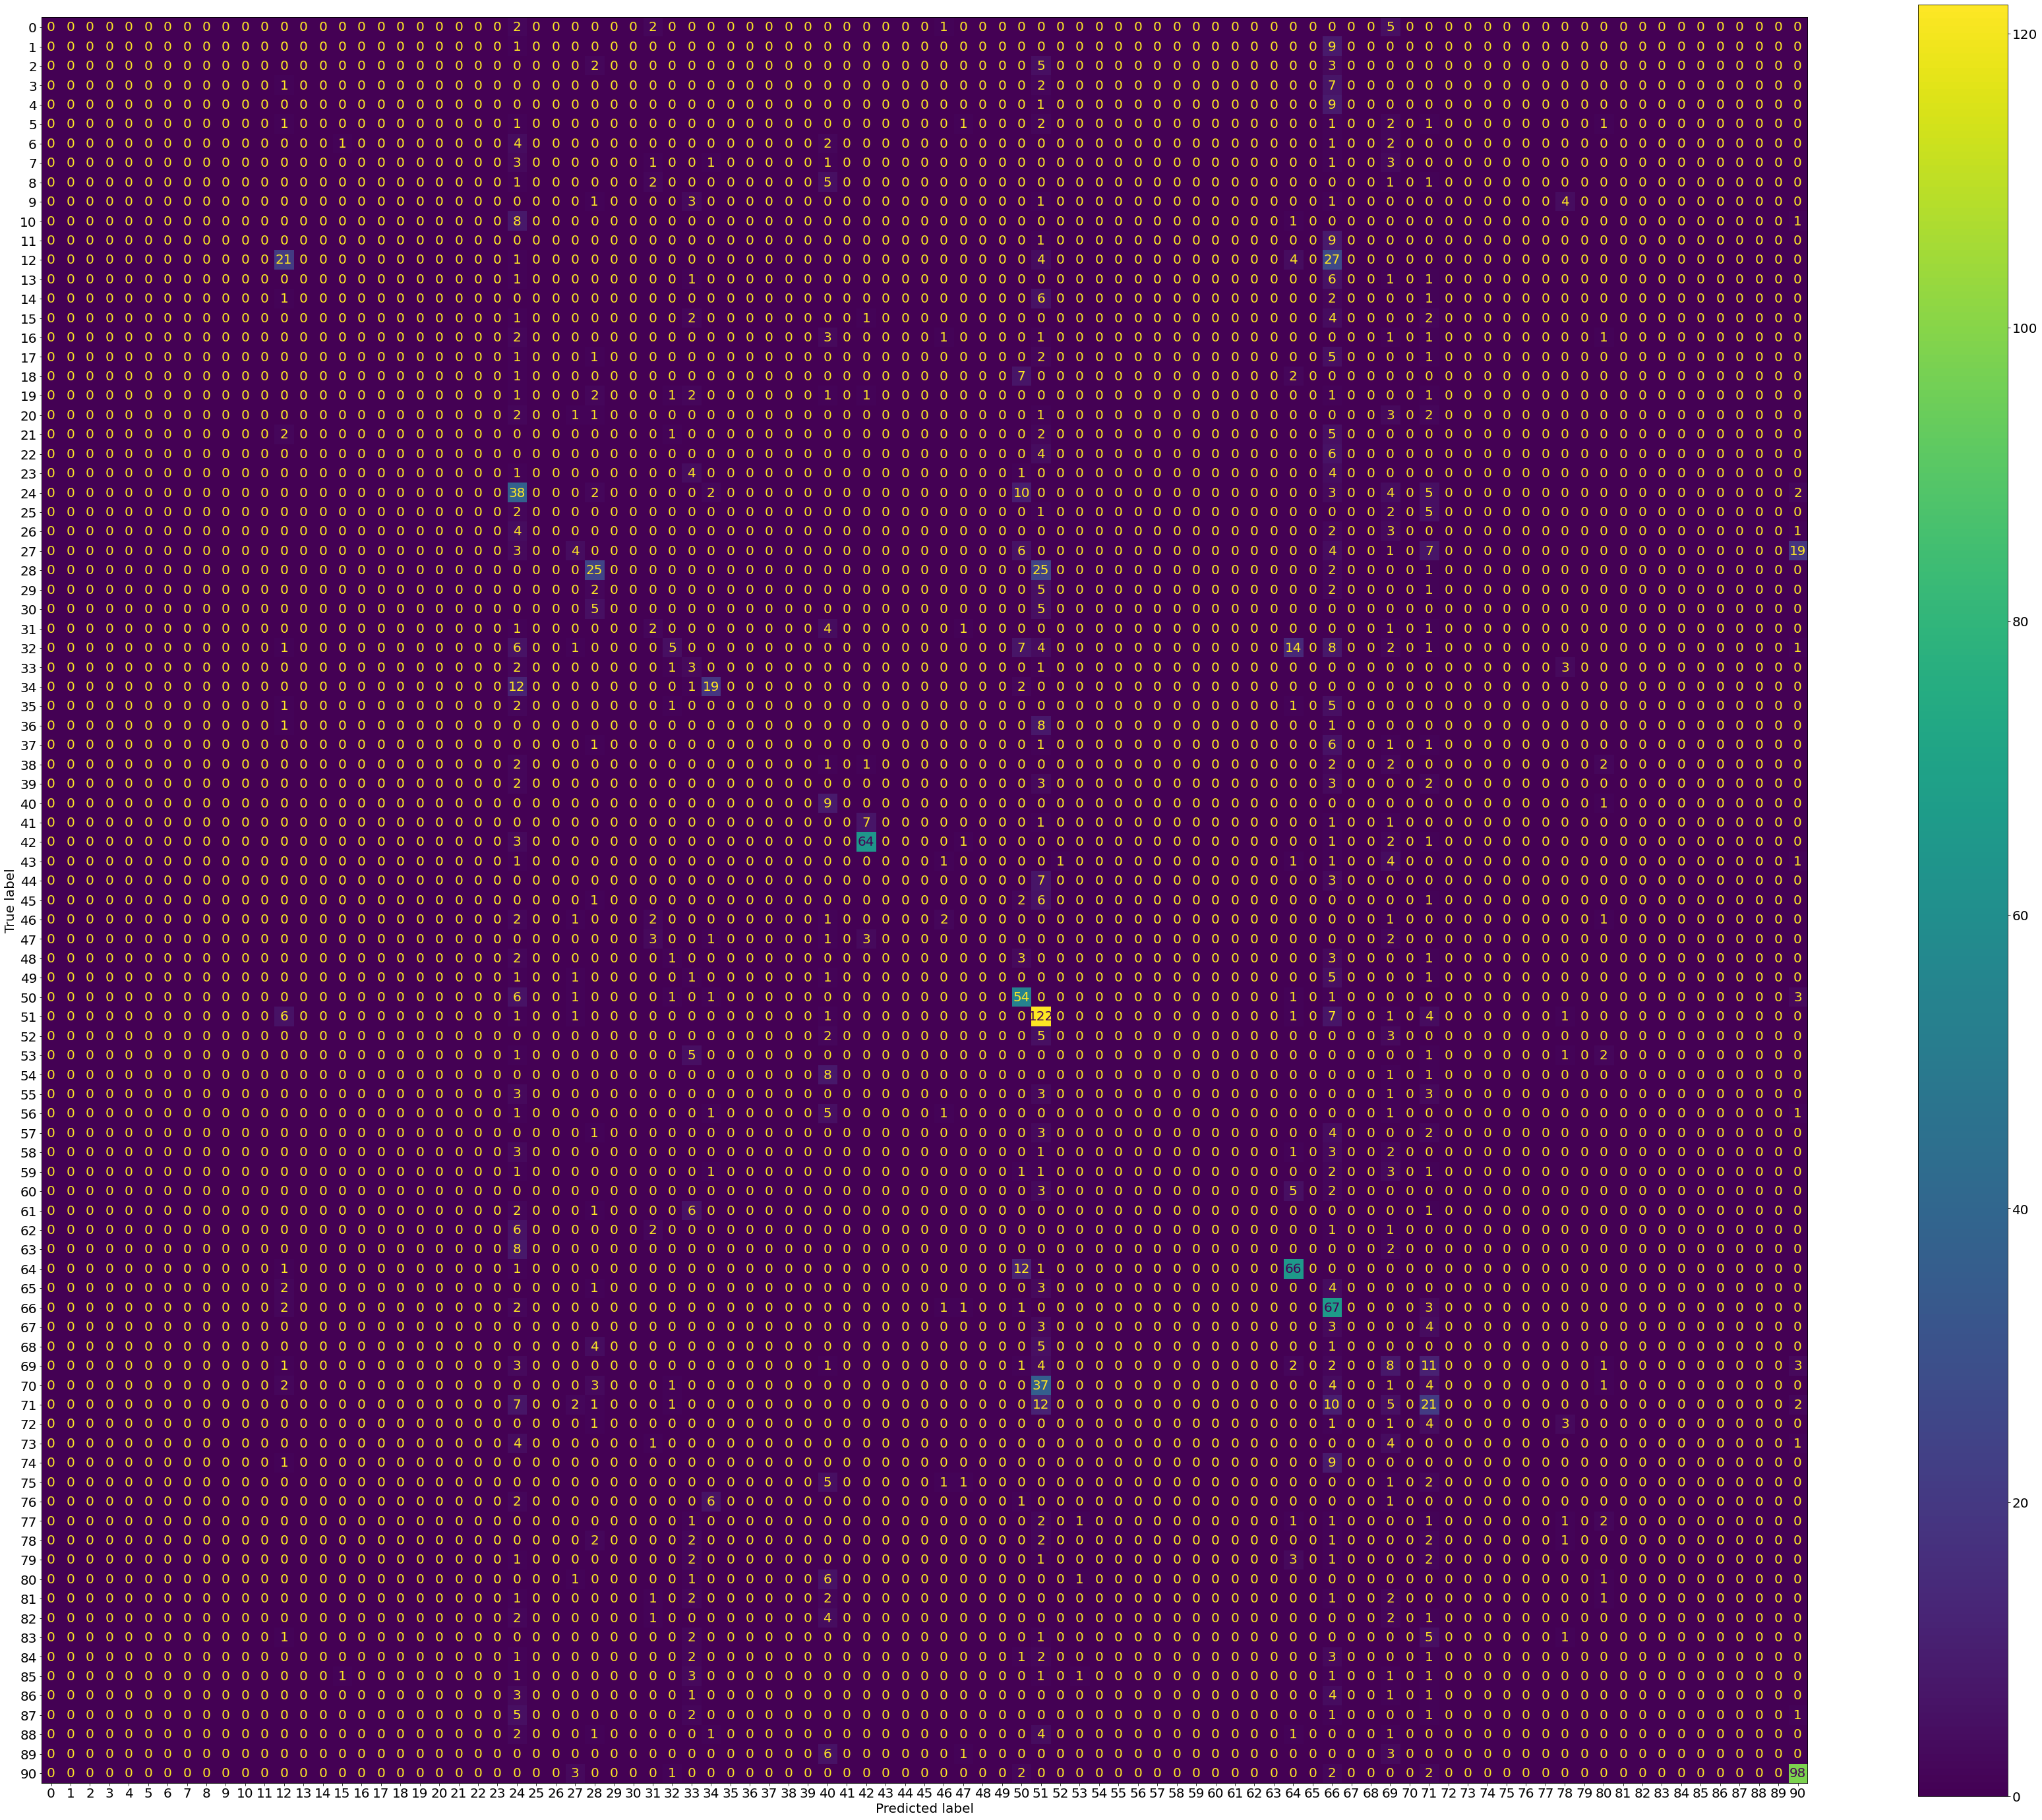

In [64]:
# inception, test data both

y_pred = inception_model.predict(test_data_both, data_both_size/(batch_size))
y_pred = np.argmax(y_pred, axis=1)

label_list = list(range(data_both_classes))

cm = confusion_matrix(test_data_both.classes, y_pred, labels=label_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.rcParams.update({'figure.figsize': (60, 50 )})
plt.rcParams.update({'font.size': 30})
plt.show()

In [57]:
print(classification_report(test_data_both.classes, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.47      0.37      0.41        57
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00        10
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
